In [1]:
import pandas as pd
import numpy as np
from dtw import dtw
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data=weather=pd.read_csv('bike_weather.csv', header=0)
data=data.drop(['Unnamed: 0','day_y'],axis=1)
data=data.set_index('day_x')
data=data.dropna()
data.head()

,Temp,Spd,Prcp,merge_date,mean_duration,num_trips
day_x,,,,,,
2013-07-01,22.834211,4.992105,58.8,20130701,978.599279,16650.0
2013-07-02,23.210345,5.800000,1.6,20130702,958.129567,22745.0
2013-07-03,23.536364,4.724242,27.1,20130703,974.328485,21864.0
2013-07-04,24.679310,4.282759,6.3,20130704,1273.108439,22326.0
2013-07-05,25.992000,4.804000,0.0,20130705,1082.426609,21842.0


In [30]:
data[data["mean_duration"]>4000]

,Temp,Spd,Prcp,merge_date,mean_duration,num_trips
day_x,,,,,,
2014-02-13,-0.297619,9.095238,66.7,20140213,4866.605023,876.0


In [32]:
data = data.drop("2014-02-13", 0)

In [33]:
data[data["mean_duration"]>4000]

,Temp,Spd,Prcp,merge_date,mean_duration,num_trips
day_x,,,,,,


In [34]:
#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bike_weather = scaler.fit_transform(data[['Temp', 'Spd', 'Prcp', 'mean_duration', 'num_trips']])
bike_weather = pd.DataFrame(bike_weather, columns=['Temp', 'Spd', 'Prcp', 'mean_duration', 'num_trips'])
bike_weather.head()

,Temp,Spd,Prcp,mean_duration,num_trips
0,0.915244,0.027274,2.161318,0.300844,-0.950180
1,0.955191,0.472237,-0.313158,0.191374,-0.585613
2,0.989814,-0.120256,0.789974,0.278004,-0.638309
3,1.111197,-0.363412,-0.109835,1.875843,-0.610675
4,1.250607,-0.076328,-0.382374,0.856100,-0.639625


In [35]:
x=np.array(data['mean_duration']).reshape(-1, 1)
y=np.array(data['Temp']).reshape(-1, 1)

In [36]:
dist, cost, acc, path = dtw(x, y, lambda x, y: np.linalg.norm(x - y, ord=2))
print(dist)

454.064140048


In [37]:
path

(array([   0,    1,    2, ..., 1455, 1456, 1457]),
 array([   0,    1,    2, ..., 1455, 1456, 1457]))

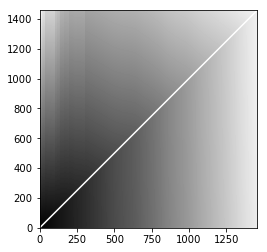

In [38]:
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')

In [14]:
np.linalg.norm(x - y, ord=2)

35705.960046727167

In [58]:
def correlation_dtw(x_col, y_col):
    x=np.array(bike_weather[x_col]).reshape(-1, 1)
    y=np.array(bike_weather[y_col]).reshape(-1, 1)
    #plt.figure(1)
    #plt.plot(x)
    #plt.figure(2)
    #plt.plot(y)
    dist, cost, acc, path = dtw(x, y, 
                                lambda x, y: np.linalg.norm(x - y, ord=2))
    print(dist)
    plt.figure(3)
    imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
    plt.plot(path[0], path[1], 'w')

0.258775383737


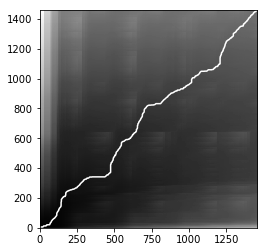

In [59]:
correlation_dtw(x_col= "Temp", y_col = "mean_duration")

0.354750756895


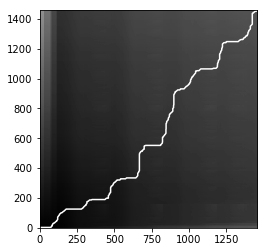

In [60]:
correlation_dtw(x_col= "Temp", y_col = "Prcp")

0.204028622716


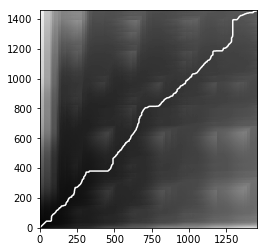

In [61]:
correlation_dtw(x_col= "Temp", y_col = "num_trips")

0.361616532447


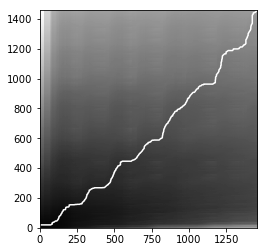

In [62]:
correlation_dtw(x_col= "Temp", y_col = "Spd")

0.296476060207


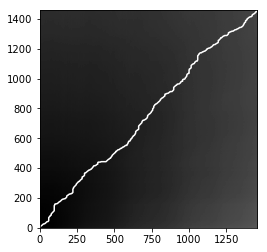

In [63]:
correlation_dtw(x_col= "Spd", y_col = "Prcp")

0.291173543207


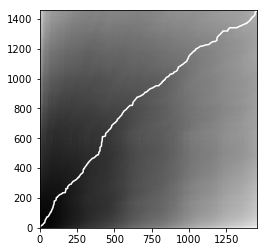

In [64]:
correlation_dtw(x_col= "Spd", y_col = "mean_duration")

0.324933812511


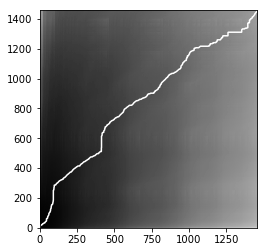

In [65]:
correlation_dtw(x_col= "Spd", y_col = "num_trips")

0.298200375115


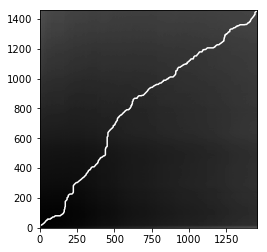

In [66]:
correlation_dtw(x_col= "Prcp", y_col = "mean_duration")

0.34181496099


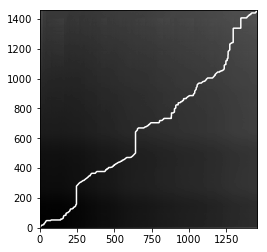

In [67]:
correlation_dtw(x_col= "Prcp", y_col = "num_trips")

0.227881552277


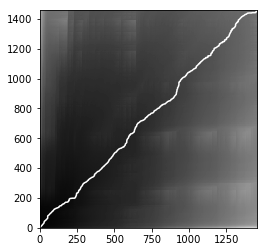

In [68]:
correlation_dtw(x_col= "mean_duration", y_col = "num_trips")